##### Nombre: Pablo César Méndez Rodas
##### Carnet: 22006487
##### Ciencia de Datos en Python, sección B
##### PAPD - Primer trimestre 2023

# Laboratorio #3 - Análisis de Datos con Python

### PARTE 1: Numpy

In [311]:
import numpy as np

##### 1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [312]:
sample = np.array([True, False])

arr1 = np.random.choice(sample,size=1000)

#Tipo de dato
print(f"El tipo de datos del array es: {arr1.dtype}")

# Tamaño del array
print(f"El array tiene: {arr1.size} elementos")
 
# Tamaño de un elemento del arreglo, en bytes
print(f"Cada elemento del array mide: {arr1.itemsize} bytes")
 
# Total de bytes consumidos por el array
print(f"El tamaño del array es: {arr1.nbytes} bytes")

El tipo de datos del array es: bool
El array tiene: 1000 elementos
Cada elemento del array mide: 1 bytes
El tamaño del array es: 1000 bytes


##### 2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [313]:
# Creamos un array con números del 1 al 100
x = np.arange(1,100)
# Creamos un array a partir del anterior, con la condición que sean números pares, si no, se inserta un cero.
y = np.where(x%2==0,x,0)
# Del array anterior, eliminamos los ceros y ordenamos decreciente.
arr2 = np.sort(y[np.nonzero(y)])[::-1]
# Imprimimos los ultimos 10 elementos
print(arr2[-10:])


# Otra opcion puede ser:
arr22 = np.arange(100,1,-2)
print(arr22[-10:])


[20 18 16 14 12 10  8  6  4  2]
[20 18 16 14 12 10  8  6  4  2]


##### 3) Dado el array 
2 4 5 6  
0 3 7 4  
8 8 5 2  
1 5 6 1  
Seleccione con una instrucción el subarray de elementos  
0 3 7 4  
Después, seleccione el subarray de elementos  
2 5  
8 5

In [314]:
arr3=np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
print("Dado el array:\n",arr3)
print(f"Primer subarray:\n {arr3[1,0:]}")
print("Segundo subarray:\n",np.array([[(arr3[0,0]),(arr3[0,2])],[(arr3[2,0]),(arr3[2,2])]]))

Dado el array:
 [[2 4 5 6]
 [0 3 7 4]
 [8 8 5 2]
 [1 5 6 1]]
Primer subarray:
 [0 3 7 4]
Segundo subarray:
 [[2 5]
 [8 5]]


##### 4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [315]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])

print(f"La resta es: {a-b}\nLa media es: {np.mean(a-b)}")

La resta es: [ 0  1  0 -2]
La media es: -0.25


##### 5) Tengo valores de cordenadas (x, y) en las columnas del array
1.33  4.5  
30.0  10.7  
70.2  0.5  
Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [316]:
arr5=np.array([[1.33,4.5],[30.0,10.7],[70.2,0.5]])
print("El array original es:\n",arr5)
n_arr5=np.append(arr5,[[37.1,-3.6]],axis=0)
print("El nuevo array es:\n",n_arr5)

El array original es:
 [[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]]
El nuevo array es:
 [[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


##### 6) Copie el array del ejercicio anterior. Traspóngalo. Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0). 

In [317]:
arr6 = np.transpose(n_arr5)
print("El array original transpuesto es:\n",arr6)
print(arr6.ndim)
n_arr6 = np.append(arr6,[[10.8,3.0],[35.8,12.0]],axis=1)
print("El nuevo array es:\n",n_arr6)

El array original transpuesto es:
 [[ 1.33 30.   70.2  37.1 ]
 [ 4.5  10.7   0.5  -3.6 ]]
2
El nuevo array es:
 [[ 1.33 30.   70.2  37.1  10.8   3.  ]
 [ 4.5  10.7   0.5  -3.6  35.8  12.  ]]


### PARTE 2: Exploración y Minería de Datos

In [318]:
#importando librerias y haciendo una breve exploracion de datos
import pandas as pd
import matplotlib.pyplot as plt
import random
dataset = pd.read_csv("NucleosPoblacionLab3.csv")
print(dataset.info())
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FID        852 non-null    int64  
 1   OBJECTID   852 non-null    int64  
 2   Texto      852 non-null    object 
 3   Poblacion  852 non-null    float64
 4   CodMun     852 non-null    int64  
 5   Municipio  852 non-null    object 
 6   CodProvin  852 non-null    int64  
 7   Provincia  852 non-null    object 
 8   X          852 non-null    float64
 9   Y          852 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 66.7+ KB
None


,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


##### 1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [319]:
# Podemos hacer un query
print("Hay",dataset.query("Poblacion>=100000")["Municipio"].count(), "municipios con mas de 100000 habitantes")
# O de esta otra manera, da el mismo resultado
print("Hay",dataset[dataset["Poblacion"]>=100000]["Municipio"].count(), "municipios con mas de 100000 habitantes")


Hay 62 municipios con mas de 100000 habitantes
Hay 62 municipios con mas de 100000 habitantes


##### 2) Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:  
a. ¿Cuál es la segunda ciudad más poblada?  
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

La segunda ciudad con mayor población es: Barcelona
El ranking de Granada es: 17


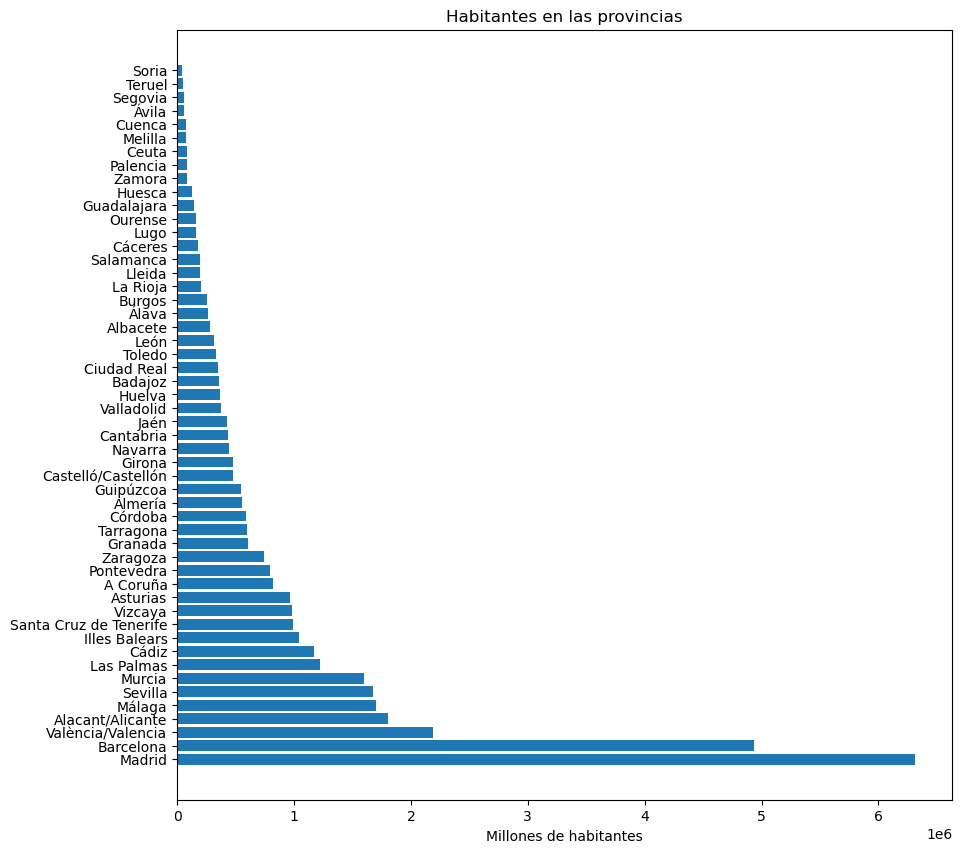

In [320]:
# Hacemo un group by para agrupar la poblacion de cada municipio dentro de la provincia
prov = pd.DataFrame(dataset.groupby(["Provincia"])["Poblacion"].sum())
# Reseteamos el index ya que el nuevo dataframe tiene el nombre de la provincia como index, creamos un nuevo index y pasamos las provincias a una columna
prov.reset_index(inplace=True)
# Definimos un nuevo dataframe con los valores ordenados ascendentemente
df = prov.sort_values(by=["Poblacion"],ascending=False)
# Reseteamos el index anterior ya que no estaba de acuerdo al nuevo orden, no creamos una nueva columna
df = df.reset_index(drop=True)
# Insertamos una nueva columna para agregar el rankin de cada provincia
df.insert(2,"Ranking",np.arange(1,53))
#Una busqueda primero por la posicion y luego lo que necesitamos que es el nombre de la provincia
print("La segunda ciudad con mayor población es:",df.iloc[1].loc["Provincia"])
#Una busqueda primero por el nombre de la provincia y luego la posicion de la respuesta (dataframe) que necesitamos.
print("El ranking de Granada es:",df[df["Provincia"]=="Granada"].iloc[0,2])

#Grafica de barras, y=nombre de provincias, x=cantidad de poblacion
plt.figure(figsize =(10, 10))
plt.barh(df.Provincia,df.Poblacion)
plt.title("Habitantes en las provincias")
plt.xlabel("Millones de habitantes")
plt.show()

##### 3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [321]:
# No existe la provincia de Extremadura, 
# Extremadura es una comunidad autónoma española compuesta por las dos provincias más extensas del país: Cáceres y Badajoz
df3 = dataset.groupby(["Provincia"]).get_group("Cáceres")
df31 = dataset.groupby(["Provincia"]).get_group("Badajoz")
df3 = pd.concat([df3,df31])
print("La comunidad de Extremadura tiene:",df3[df3["Poblacion"]>5000]["Municipio"].count()," municipios con mas de 5000 habitantes")


La comunidad de Extremadura tiene: 14  municipios con mas de 5000 habitantes


##### 4) ¿Cuál es el municipio situado más al Norte? (Usar elvalor de la coordenada "Y" que representa la latitud engrados). 
Proporcione también la provincia a la que pertenece y su población.

In [322]:
print(dataset.sort_values("Y",ascending=False).iloc[0].loc[["Municipio","Provincia","Poblacion"]])

Municipio    Viveiro
Provincia       Lugo
Poblacion    16211.0
Name: 104, dtype: object


##### 5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [323]:
df5 = dataset.groupby(["Provincia"]).get_group("Granada").agg({"Poblacion": ['sum','count','mean', 'min', 'max','median','std']})
print("Granada\n",df5)

Granada
             Poblacion
sum     604357.000000
count       20.000000
mean     30217.850000
min      10386.000000
max     239154.000000
median   17526.000000
std      50355.491715


##### 6) Realice un histograma con la población de los Municipios para cada una de las provincias.

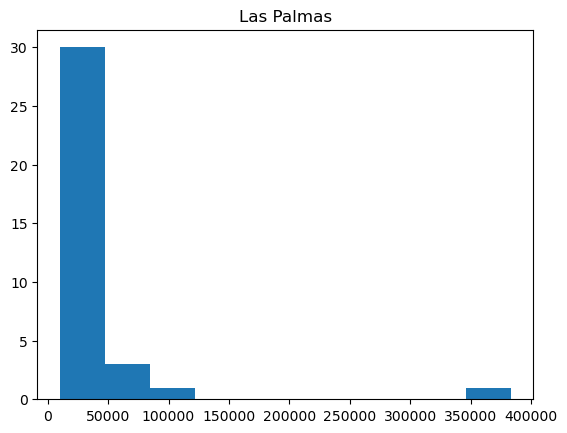

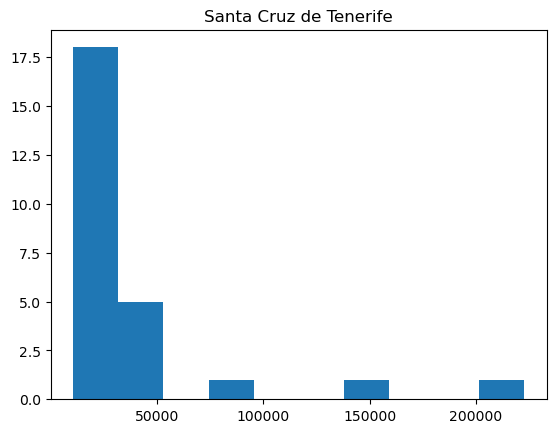

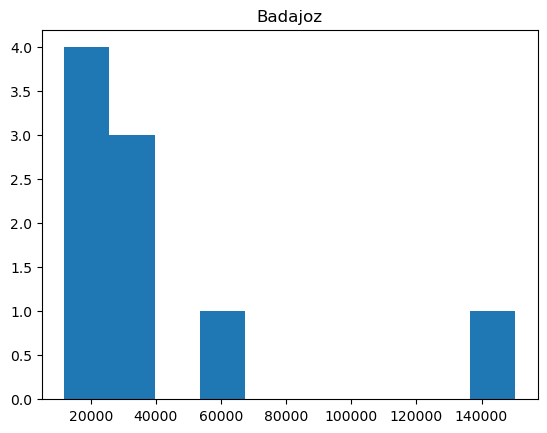

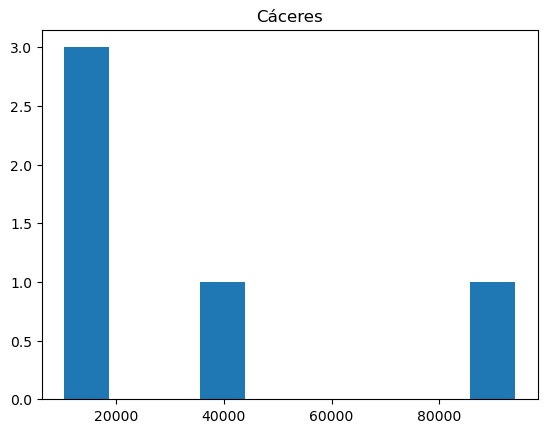

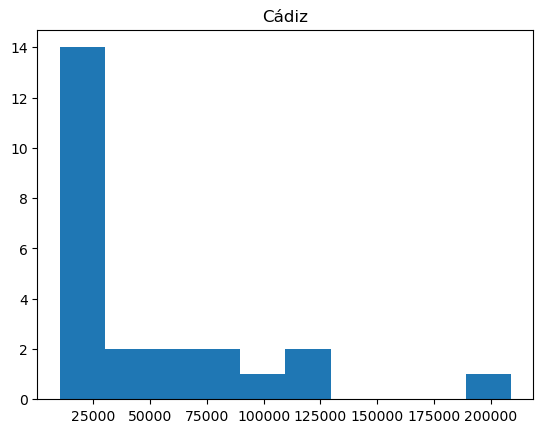

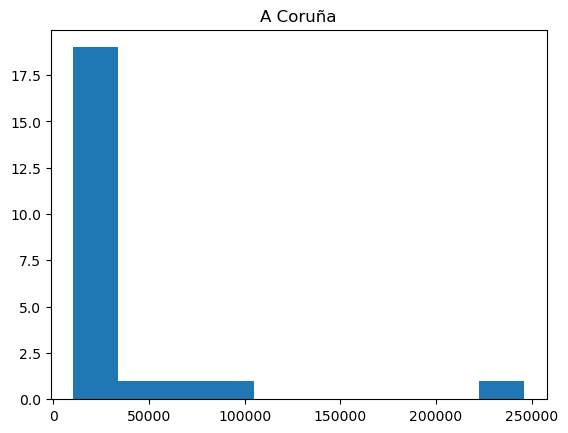

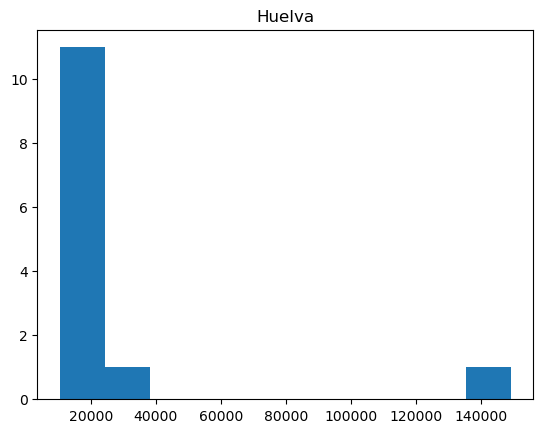

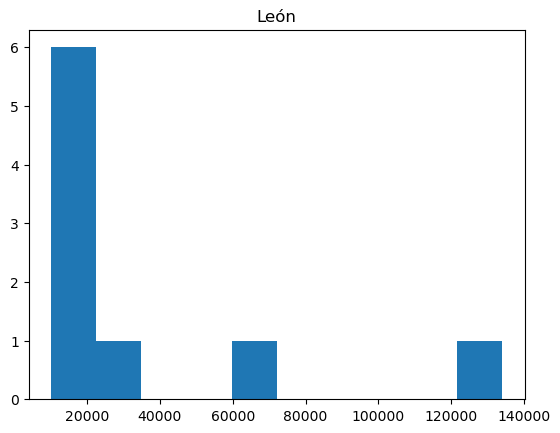

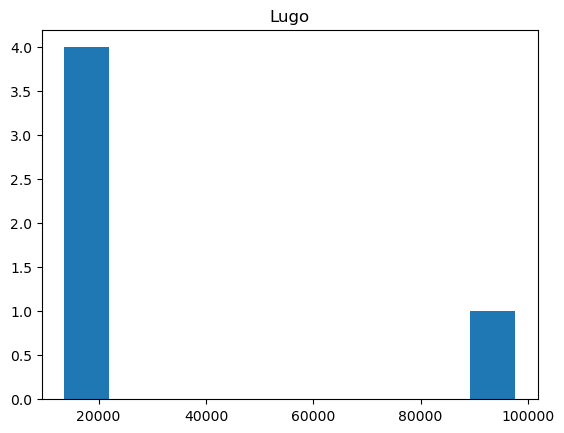

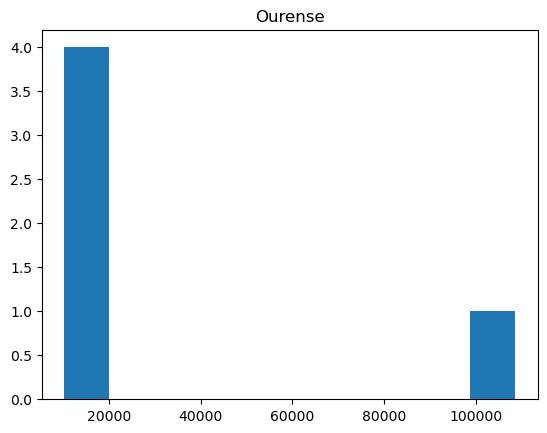

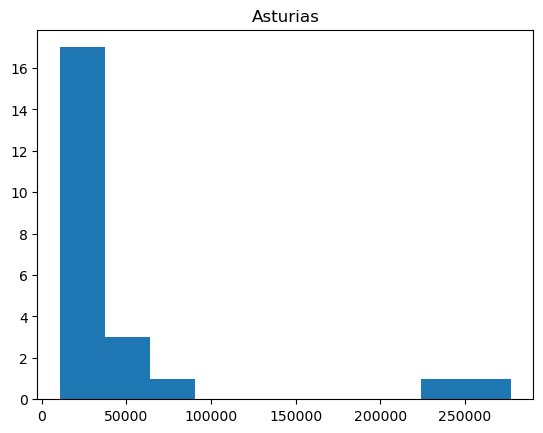

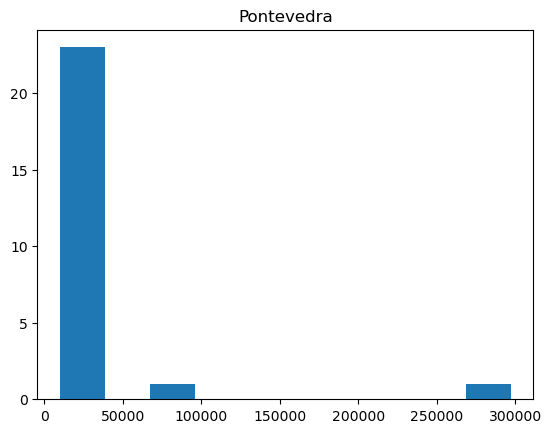

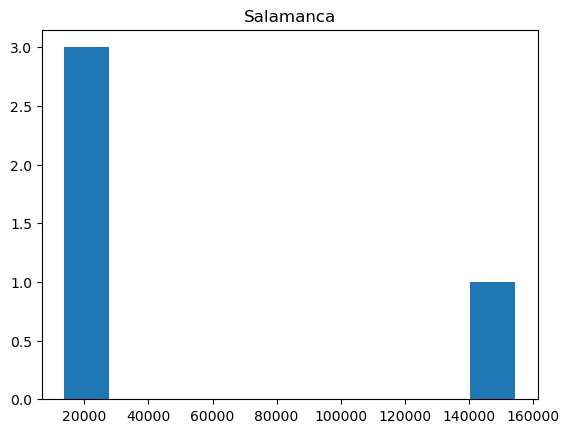

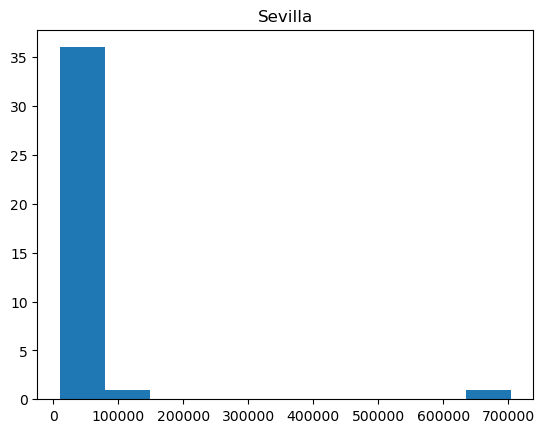

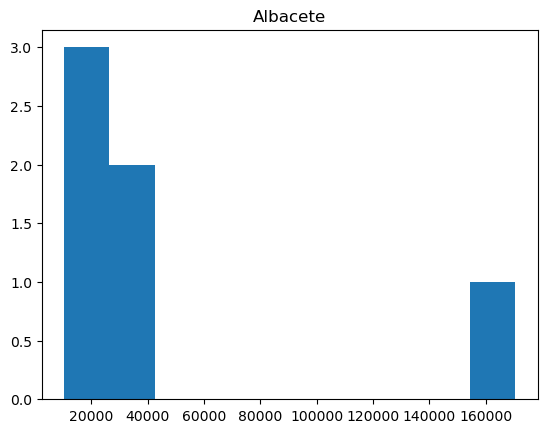

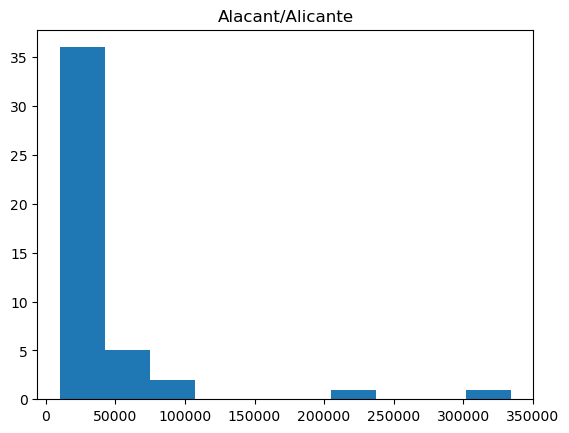

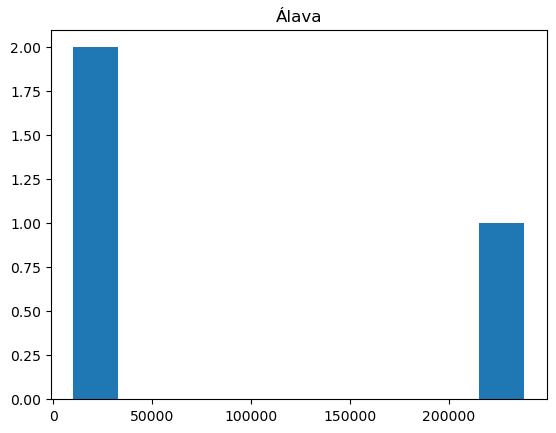

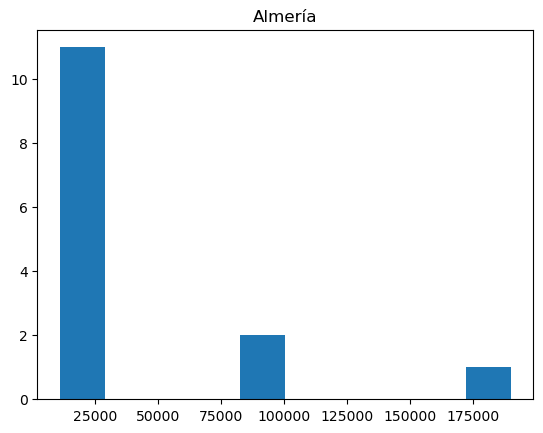

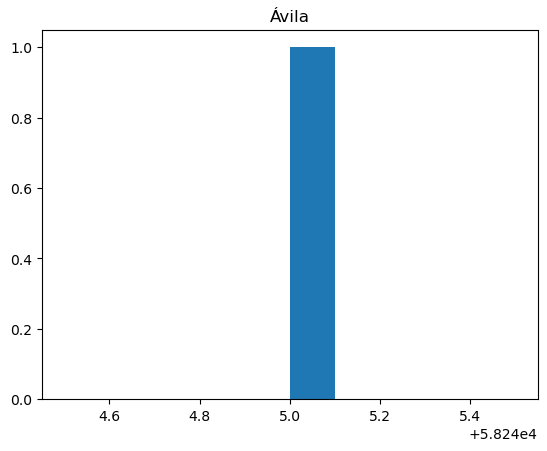

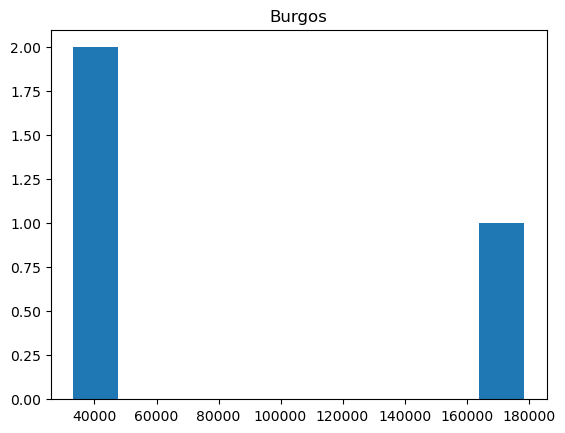

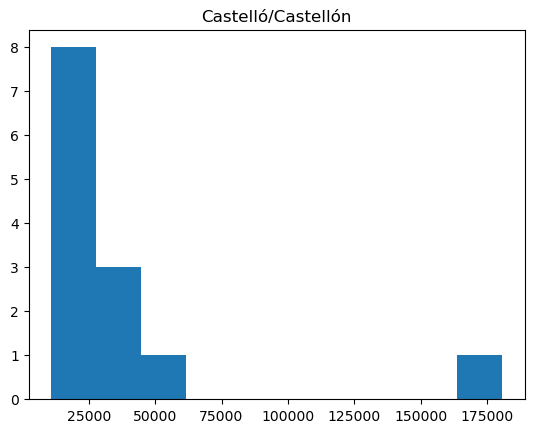

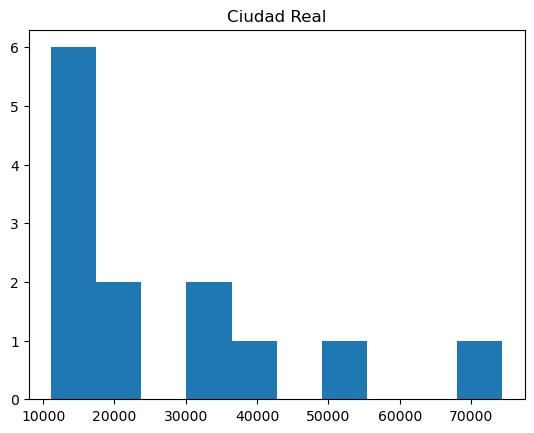

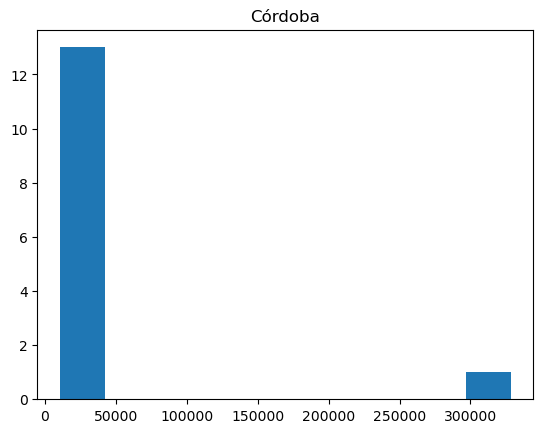

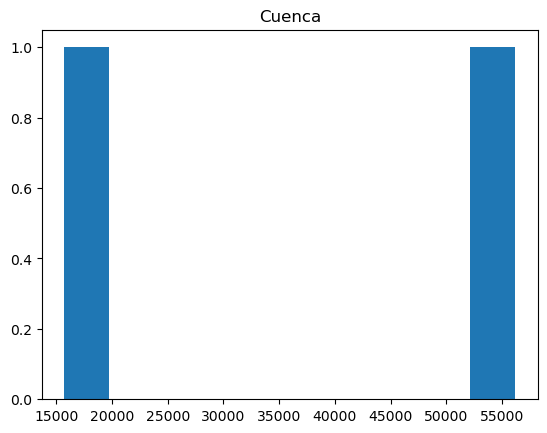

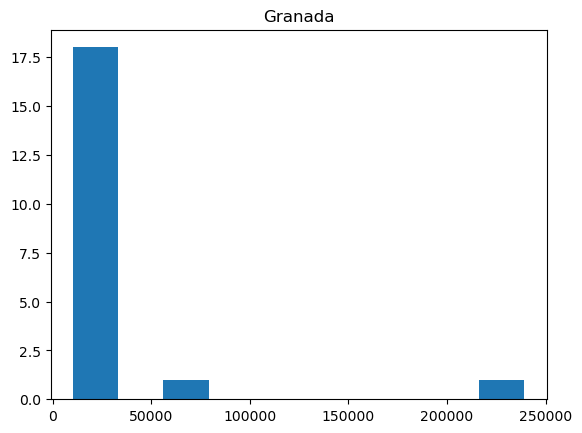

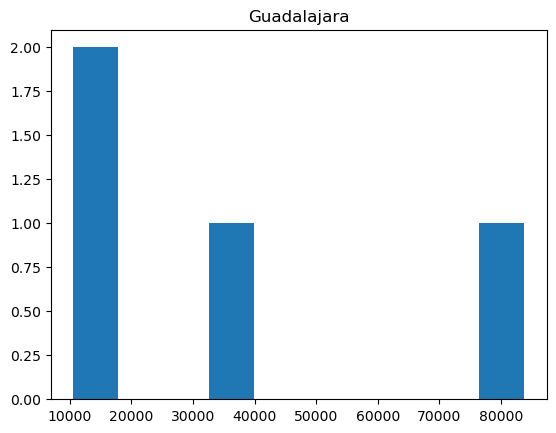

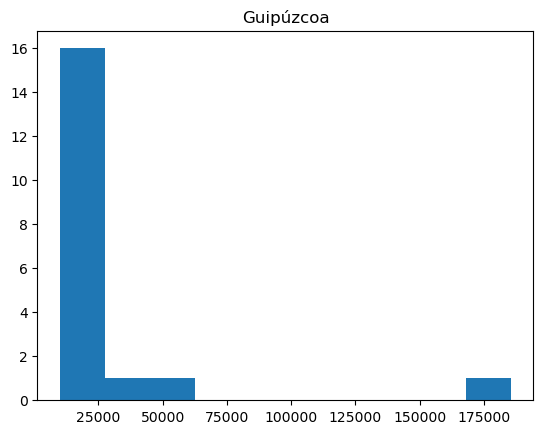

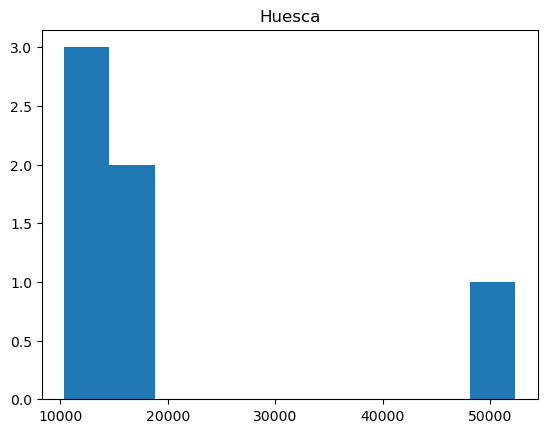

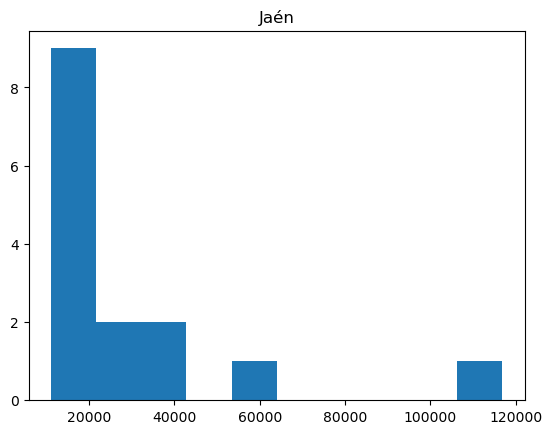

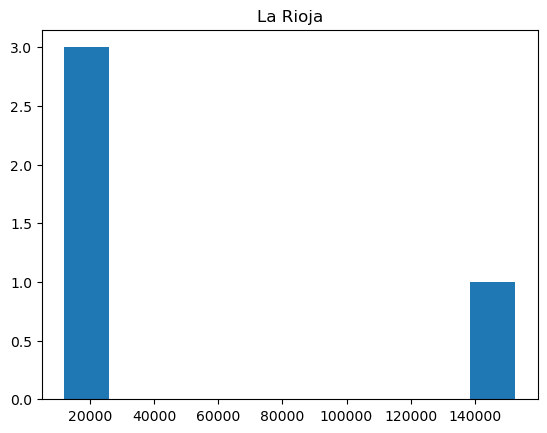

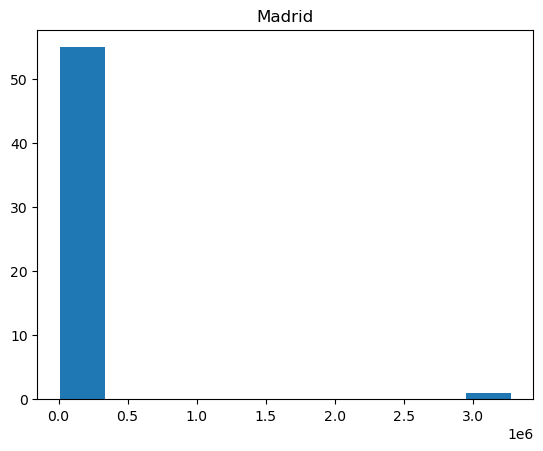

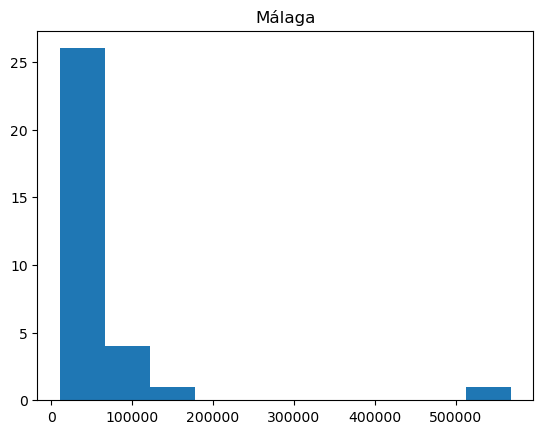

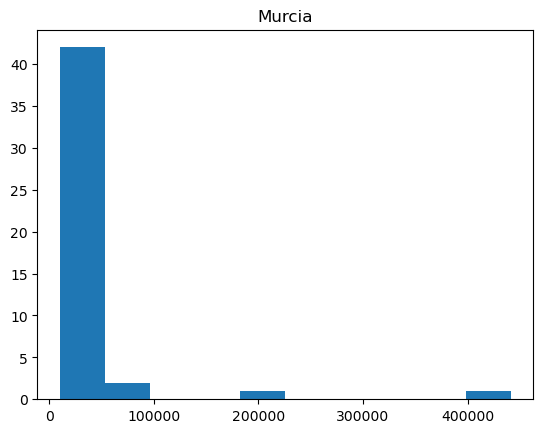

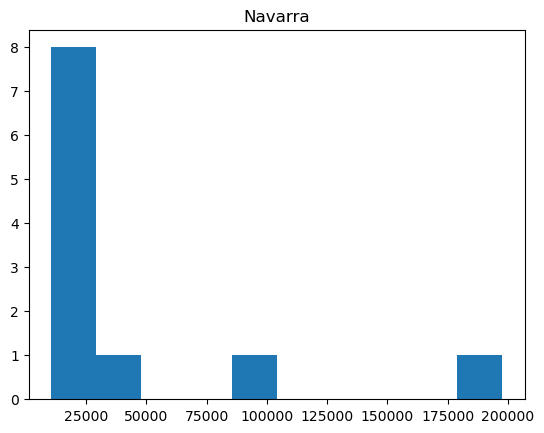

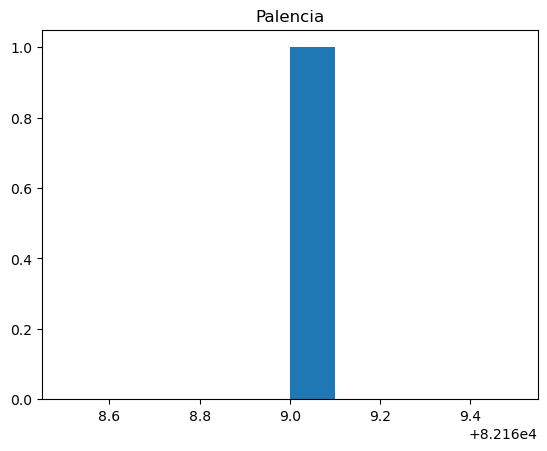

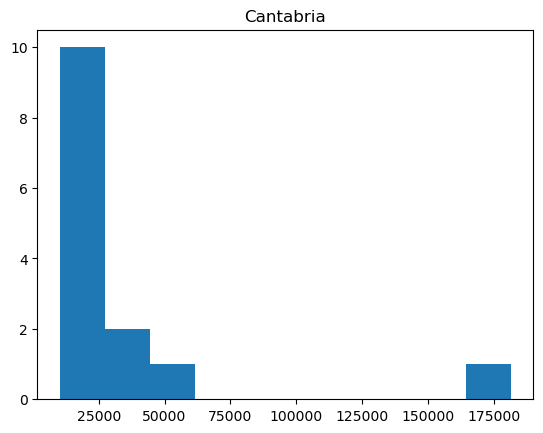

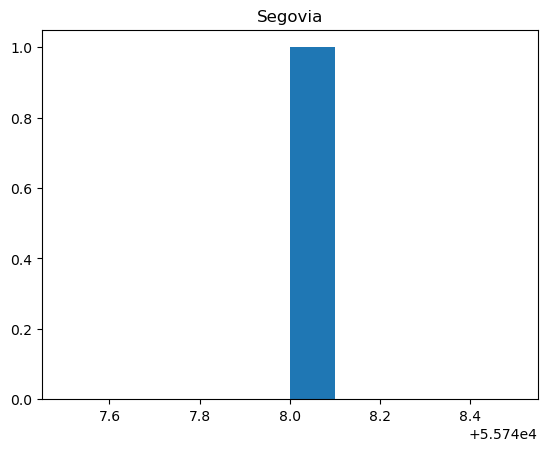

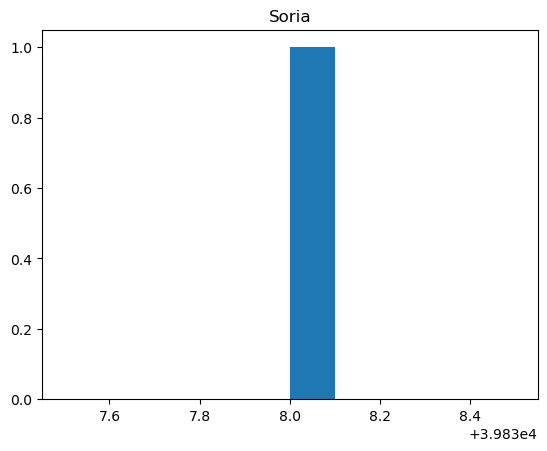

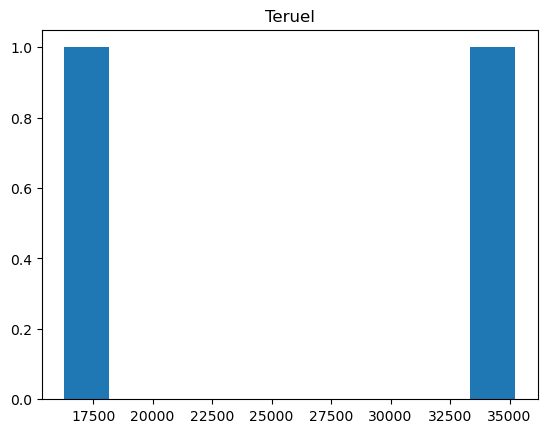

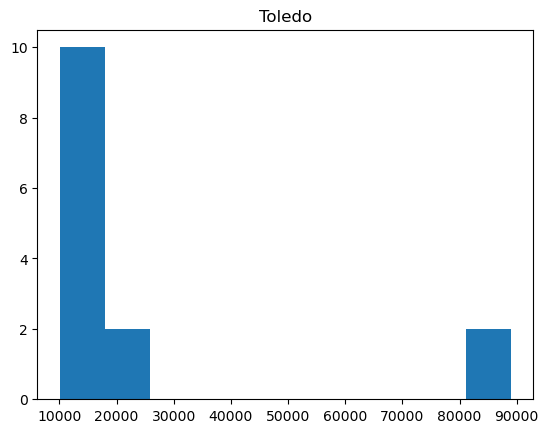

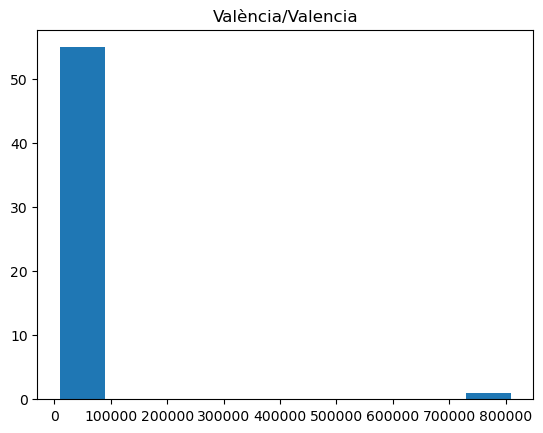

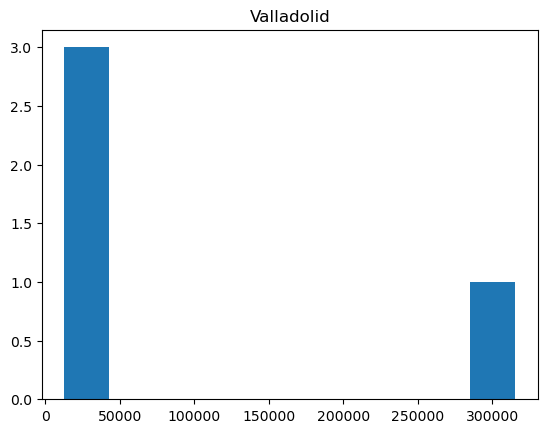

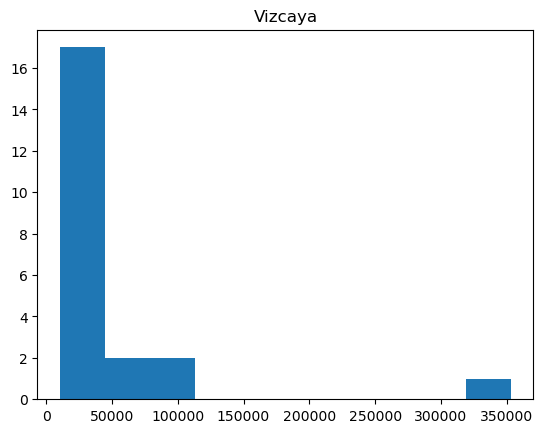

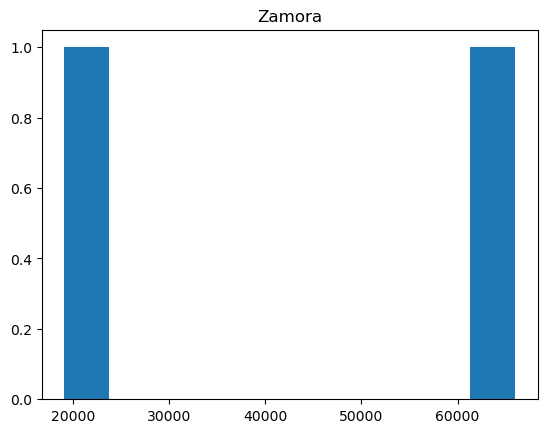

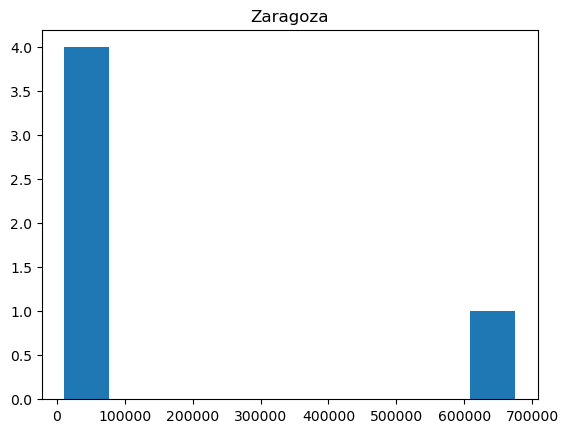

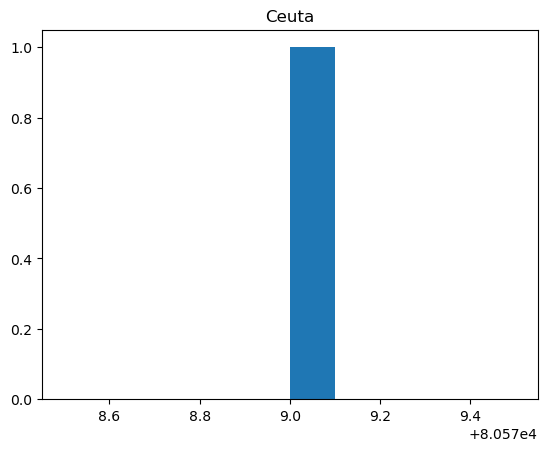

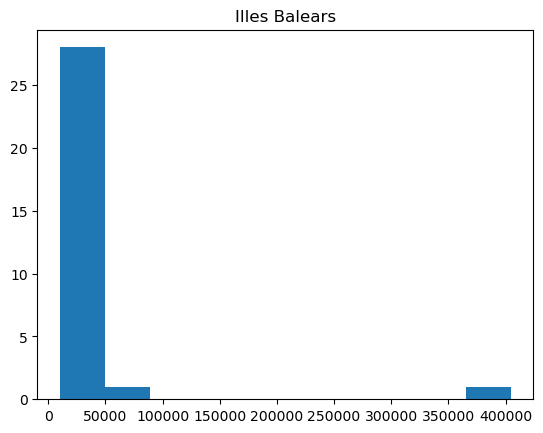

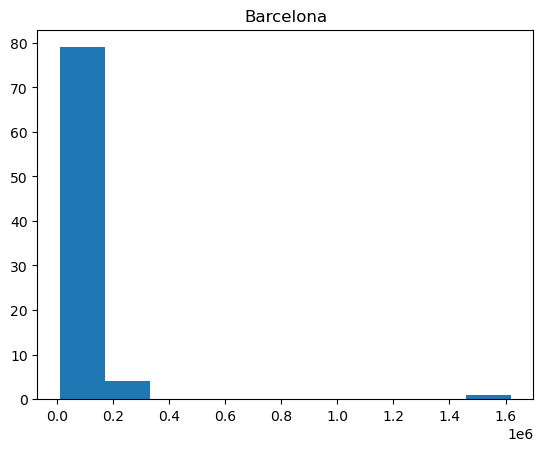

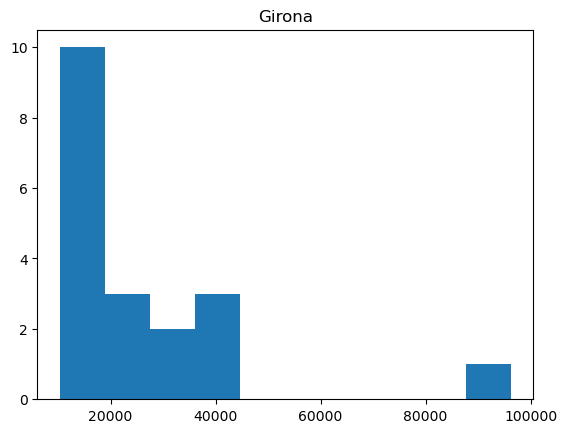

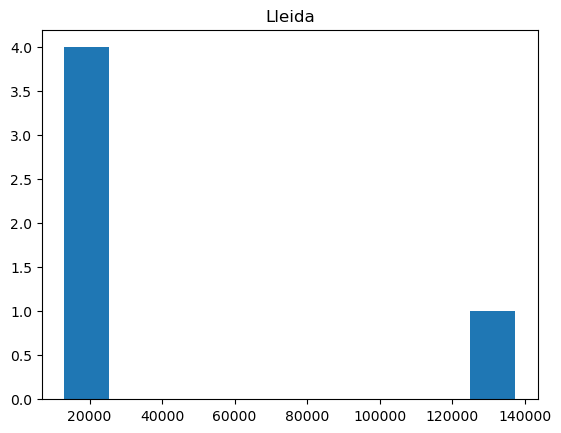

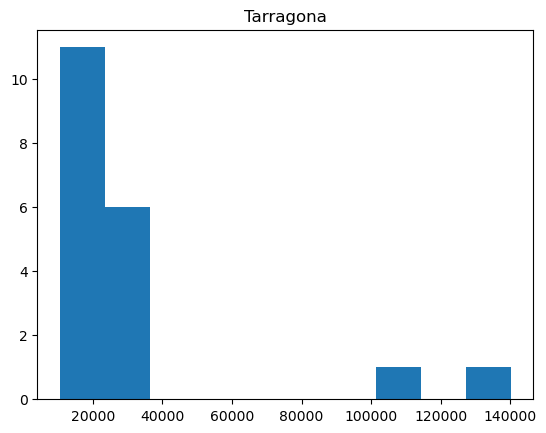

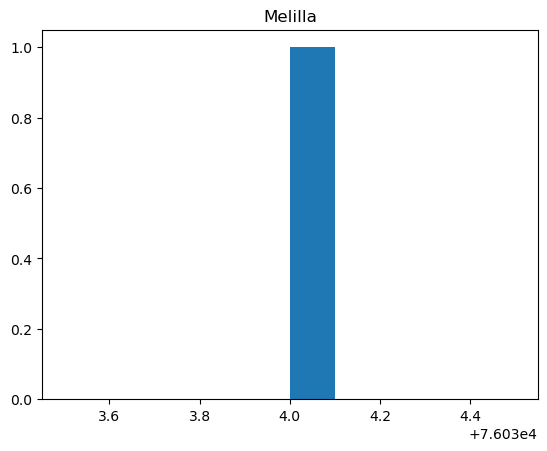

In [324]:
# Primero creamos una lista con los nombres de cada provincia
provname = dataset.Provincia.unique()

#Hacemos un for para que corra con cada nombre que ingrese
for name in provname:
    #Agrupamos y obtenemos el nombre de la provincia que nos interesa
    df66 = dataset.groupby(["Provincia"]).get_group(name)
    plt.title(name)
    #Graficamos con la poblacion del subgrupo iterado
    plt.hist(df66.Poblacion)
    plt.show()

##### 7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [325]:
# Primero obtenemos la lista valores unicos de los municipios
muniname = list(dataset.Municipio.unique())
# Obtenemos una lista random de los 50 municipios, el random.sample obtiene solo valores unicos, random.choice puede obtener repetidos
azar = random.sample(muniname, 50)

# definimos un nuevo dataset, filtrando solo las columnas de Municipio y Poblacion, incluye todas las filas
# Establecemos la columna de Municipio como indice para que puedan usarse dichos valores en la busqueda.
df7 = dataset.loc[:,["Municipio","Poblacion"]].set_index("Municipio")
# Realizamos la busqueda de nuestra lista de 50 municipios dentro del indice, realizamos operaciones de aggregation a la poblacion
df7.loc[azar].agg({"Poblacion": ['sum','mean', 'min', 'max','std']})


,Poblacion
sum,2.421059e+06
mean,4.174240e+04
min,1.044000e+04
max,3.833080e+05
std,6.368465e+04


##### 8) Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [327]:
# Creamos un dataframe que solo contenga el nombre del municipio y las coordenadas
# Establecemos de index el municipio para poder llamarlo
coord = pd.DataFrame(dataset.loc[:,["Municipio","X","Y"]].set_index("Municipio"))
# Creamos columnas adyacentes para determinar la hipotenusa de las coordenadas y la diferencia con la hipotenusa de Madrid en valor absoluto
coord["Hipotenusa"] = (coord["X"]**2+coord["Y"]**2)**(1/2)
coord["Diferencia"] = abs(coord.loc["Madrid"]["Hipotenusa"]-coord["Hipotenusa"])
# Establecemos un nuevo dataframe eliminando a Madrid y ordenando de menor a mayor la diferencia
df8 = coord.drop("Madrid",axis=0).sort_values(by=["Diferencia"],ascending=False)
# Reseteamos el index para poder llamar la columna municipio
df8.reset_index(inplace=True)

print("El municipio mas cercano a Madrid es:",df8.iloc[0]["Municipio"],"\n")
print("El municipio mas lejano a Madrid es:",df8.iloc[-1]["Municipio"])

El municipio mas cercano a Madrid es: Tuineje 

El municipio mas lejano a Madrid es: Coslada
